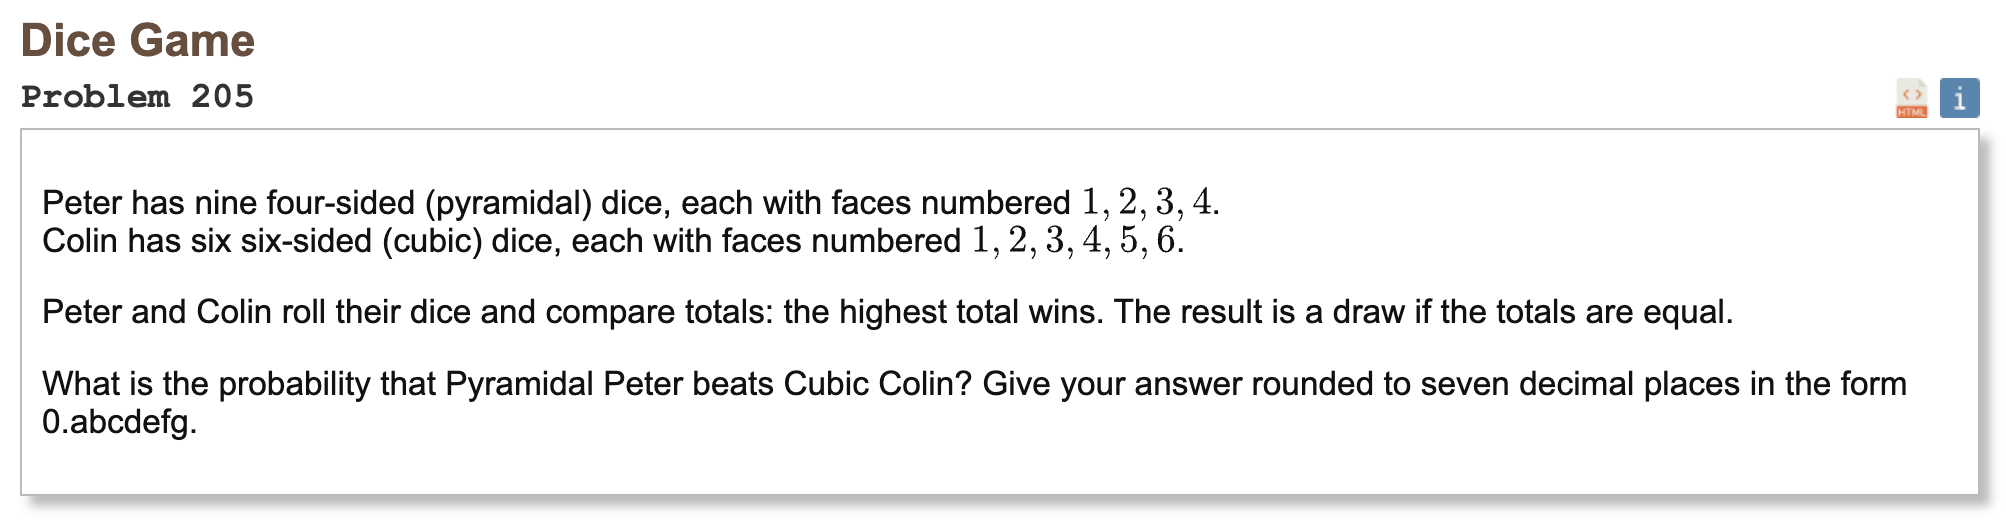

## Initial approach

* list all primes up to 100 because only those primes are allowed as factors
* count all products of these primes that stay at or below 10^9
* do it with a depth first recursion over the prime list, at each prime you try exponent 0,1,2,… until the product would exceed the remaining limit
* each recursive call returns how many valid numbers you can build from the remaining primes under the reduced limit
* include the empty choice as 1 so the number 1 is counted (it has no prime factors and is valid)
* this avoids generating huge lists, it only explores feasible exponent combinations
* the final returned count is the number of generalized hamming numbers of type 100 not exceeding 10^9

In [1]:
def sieve(n):
    is_prime = [True] * (n + 1)
    is_prime[0] = False
    is_prime[1] = False
    p = 2
    while p * p <= n:
        if is_prime[p]:
            step = p
            start = p * p
            for x in range(start, n + 1, step):
                is_prime[x] = False
        p += 1
    return [i for i in range(2, n + 1) if is_prime[i]]

def count_hamming(primes, idx, limit):
    if idx == len(primes):
        return 1
    p = primes[idx]
    total = 0
    v = 1
    while v <= limit:
        total += count_hamming(primes, idx + 1, limit // v)
        v *= p
    return total

In [2]:
%%time
primes = sieve(100)
result = count_hamming(primes, 0, 10**9)
print("Result:", result)

Result: 2944730
CPU times: user 1.55 s, sys: 11 ms, total: 1.56 s
Wall time: 1.56 s
